---
# Word2Vec
- 자연어 처리(NLP)에서 단어를 벡터 형태로 표현하기 위해 사용되는 기술
- 주요 목표는 단어를 고차원 공간의 벡터로 변환하여 컴퓨터가 단어 간의 의미적 유사성을 이해하고 처리할 수 있게 하는 것
- 해당 모델은 강사님께서 제공해주셨는데, 용량이 너무 크기도 하고 deploy 하기가 어려워 코드만 올리기로 한다

---

## Word2Vec

In [1]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [50]:
from gensim.models.word2vec import Word2Vec
import pandas as pd
import gensim
from konlpy.tag import Okt

In [3]:
#  Nsmc 데이터 로드
train_df = pd.read_csv('./data/ratings_train.csv')
train_df.dropna(inplace=True)

기본 전처리 과정

1. 한글만 남김 (특수 기호 제거)
2. 명사만 추출

In [4]:
train_df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [5]:
import re
# 정규식 이용하여 한글만 추출 : "[^ㄱ-ㅎㅏ-ㅣ가-힣]"
train_df['document'] = train_df['document'].apply(lambda x: re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "", x))

In [6]:
# 데이터 확인
train_df

,id,document,label
0,9976970,아더빙진짜짜증나네요목소리,0
1,3819312,흠포스터보고초딩영화줄오버연기조차가볍지않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소이야기구먼솔직히재미는없다평점조정,0
4,6483659,사이몬페그의익살스런연기가돋보였던영화스파이더맨에서늙어보이기만했던커스틴던스트가너무나도이...,1
...,...,...,...
149995,6222902,인간이문제지소는뭔죄인가,0
149996,8549745,평점이너무낮아서,1
149997,9311800,이게뭐요한국인은거들먹거리고필리핀혼혈은착하다,0
149998,2376369,청춘영화의최고봉방황과우울했던날들의자화상,1


In [7]:
# 불용어 정의
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '을', '를', '는', '으로']

---
# 강사님ver
---

In [53]:
okt = Okt()
tokenized_words, sentence_nouns = [] , []

for sentence in train_df['document'][:50]:
    # 형태소 단위
    tokenized_word = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized_word if word not in stopwords]
    tokenized_words.append(stopwords_removed_sentence)
   
    # 명사 단위
    nouns = okt.nouns(sentence)
    sentence_nouns.append(nouns)

In [46]:
# 리뷰의 최대 길이
word_len = [len(l) for l in tokenized_words]
nouns_len = [len(l) for l in sentence_nouns]
print(f"가장 긴 리뷰 길이: {max(word_len)}, 가장 짧은 리뷰 길이: {min(word_len)}")
print(f"가장 긴 리뷰(명사 기준) 길이: {max(nouns_len)}, 가장 짧은 리뷰(명사 기준) 길이: {min(nouns_len)}")

가장 긴 리뷰 길이: 69, 가장 짧은 리뷰 길이: 0
가장 긴 리뷰(명사 기준) 길이: 66, 가장 짧은 리뷰(명사 기준) 길이: 0


---
# 나
---

In [10]:
# 형태소 분석 및 불용어 제거하여 데이터 전처리하기
# 1. 문서 하나씩 읽어오기 (50개만)
document_list = train_df['document'][:50].tolist()

# 2. 문서에 okt 형태소 분석 적용 (morphs함수, stem=True 변경)
from konlpy.tag import Okt
okt = Okt()

tokenized_words, sentence_nouns = [] , []

for document in document_list[:50]:
    morphs = okt.morphs(document, stem=True)
    nouns = okt.nouns(document)
    # 형태소 분석 결과에서 불용어를 제거하고 단어를 리스트에 추가합니다.
    clean_morphs = [word for word in morphs if word not in stopwords]
    clean_nouns = [word for word in nouns if word not in stopwords]
    # 문서별 형태소 추출 결과를 리스트에 추가합니다.
    tokenized_words.append(clean_morphs)
    sentence_nouns.append(clean_nouns)

# 4. tokenized_words 리스트(문서 별 형태소 추출): [[words, words, words], [words, words, words]]
print(tokenized_words)
# 5. sentence_nouns 리스트(문서 별 명사 리스트): [[noun, noun, noun, noun], [noun, noun, noun, noun]]
print(sentence_nouns)

# 리스트를 Series로 변환
tokenized_words_series = pd.Series(tokenized_words)
sentence_nouns_series = pd.Series(sentence_nouns)

# 새로운 데이터프레임 생성
new_df = pd.DataFrame()

# 데이터프레임에 열 추가
new_df['tokenized_words'] = tokenized_words_series
new_df['sentence_nouns'] = sentence_nouns_series
new_df


[['아더', '빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '한', '다'], ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정'], ['사이', '몬페', '그', '익살스럽다', '연기', '돋보이다', '영화', '스파이더맨', '에서', '늙다', '보이다', '하다', '크다', '스틴던스트', '너무나도', '이쁘다', '보이다'], ['막', '걸음', '마', '떼다', '초등학교', '학년', '생인', '살다', '영화', 'ㅋㅋㅋ', '별', '반개', '도', '아깝다', '움'], ['원작', '긴장감', '을제', '대로', '살리다', '하다'], ['별', '반개', '도', '아깝다', '다욕', '나오다', '이응경', '길용우', '연기', '생활', '몇년', '인지', '정말', '발', '로', '해도', '그것', '보단', '낫다', '납치', '감금', '만', '반복', '반복', '드라마', '가족', '도', '없다', '연기', '못', '하', '사람', '만', '모', '엿', '네'], ['액션', '없다', '재미있다', '몇', '안되다', '영화'], ['왜케', '평점', '낮다', '꽤볼', '만', '한', '데', '헐리우드', '식', '화려하다', '너무', '길들이다'], ['걍', '인피니트', '짱', '이다', '진짜', '짱', '이다'], ['볼때', '마다', '눈물나다', '죽다', '년대', '향수', '자극', '허진호', '감성', '절제', '멜로', '달인', '이다'], ['울면', '서손', '고', '횡단보도', '건너다', '때', '뛰다', '치다', '나오다', '뻔', '이범수', '연기', '드럽다', '못', 

,tokenized_words,sentence_nouns
0,"[아더, 빙, 진짜, 짜증나다, 목소리]","[아더, 빙, 진짜, 목소리]"
1,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍다, 않다]","[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기]"
2,"[너, 무재, 밓었, 다그, 래서, 보다, 추천, 한, 다]","[무재, 밓었, 다그, 래서, 추천]"
3,"[교도소, 이야기, 구먼, 솔직하다, 재미, 없다, 평점, 조정]","[교도소, 이야기, 구먼, 재미, 평점, 조정]"
4,"[사이, 몬페, 그, 익살스럽다, 연기, 돋보이다, 영화, 스파이더맨, 에서, 늙다...","[몬페, 연기, 영화, 스파이더맨, 스틴던스트]"
5,"[막, 걸음, 마, 떼다, 초등학교, 학년, 생인, 살다, 영화, ㅋㅋㅋ, 별, 반...","[막, 걸음, 마, 초등학교, 학년, 생인, 영화, 반개, 움]"
6,"[원작, 긴장감, 을제, 대로, 살리다, 하다]","[원작, 긴장감, 을제]"
7,"[별, 반개, 도, 아깝다, 다욕, 나오다, 이응경, 길용우, 연기, 생활, 몇년,...","[반개, 다욕, 이응경, 길용우, 연기, 생활, 몇년, 정말, 발, 해도, 그것, ..."
8,"[액션, 없다, 재미있다, 몇, 안되다, 영화]","[액션, 몇, 영화]"
9,"[왜케, 평점, 낮다, 꽤볼, 만, 한, 데, 헐리우드, 식, 화려하다, 너무, 길...","[왜케, 평점, 꽤볼, 데, 헐리우드]"


In [47]:
# 리뷰의 최대 길이
# 문자열의 최대/최소 길이 구하기
max_length = train_df['document'][:50].str.len().max()
min_length = train_df['document'][:50].str.len().min()

# 각 리뷰의 명사 개수를 구하여 최대/최소 길이 구하기
max_noun_length = train_df['document'][:50].apply(lambda x: len(okt.nouns(x))).max()
min_noun_length = train_df['document'][:50].apply(lambda x: len(okt.nouns(x))).min()

print(f"가장 긴 리뷰 길이: {max_length}, 가장 짧은 리뷰 길이: {min_length}")
print(f"가장 긴 리뷰(명사 기준) 길이: {max_noun_length}, 가장 짧은 리뷰(명사 기준) 길이: {min_noun_length}")
'''
결과
가장 긴 리뷰 길이 : 95, 가장 짧은 리뷰 길이 : 1
가장 긴 리뷰(명사 기준) 길이 : 66, 가장 짧은 리뷰(명사 기준) 길이 : 0
'''

가장 긴 리뷰 길이: 101, 가장 짧은 리뷰 길이: 4
가장 긴 리뷰(명사 기준) 길이: 28, 가장 짧은 리뷰(명사 기준) 길이: 0


'\n결과\n가장 긴 리뷰 길이 : 95, 가장 짧은 리뷰 길이 : 1\n가장 긴 리뷰(명사 기준) 길이 : 66, 가장 짧은 리뷰(명사 기준) 길이 : 0\n'

---
---
---
---
---

## Word2Vec 훈련

vector_size = 워드 벡터의 특징 값, 즉 임베딩 된 벡터의 차원  
window = 컨텐스트 윈도우 크기  
min_count = 단어 최소 빈도 수 제한(빈도가 적은 단어들을 학습하지 않도록 하는 기준)  
workers = 학습을 위한 프로세스 수 (workers로 설정을 하거나 혹은 multiprocessing으로 병렬처리)  
sg = 0 (CBOW) , 1 (Skip-gram)  

# word2vec 모델 훈련하기  -> no run

```
model_cbow = Word2Vec(tokenized_words, vector_size=100, window=5, min_count=5, workers=4, sg=0)
model_skipgram = Word2Vec(tokenized_words, vector_size=100, window=5, min_count=5, workers=4, sg=0)
```

## 완성된 임베딩 매트릭스의 크기 확인(단어수, 차원수)  -> no run
```
print(model_cbow.wv.voctors.shape)
print(model_skipgram.wv.voctors.shape)
```

'''
결과
(15204, 100)
(15204, 100)
'''

모델 저장 방법

1. 재훈련 없이 모델만 사용
2. 재훈련을 할 수 있도록 임베딩에 대한 기본 정보를 함께 저장

## 모델 저장 방법 1 : 재훈련을 하지 않는 경우  -> no run
#### Ram에 로드하지 않고도 디스크나 네트워크에서 데이터를 즉시 읽어 반복할 수 있음
#### 모델 inference 에서 활용하면 좋음
```
model_cbow.wv.save_word2vec_format('./data/kor_w2v_cbow')
model_skipgram.wv.save_word2vec_format('./data/kor_w2v_skipgram')
```

In [12]:
# 모델 저장 방법1의 결과를 다시 로드해서 사용

from gensim.models import KeyedVectors

# 모델 불러오기
model_cbow_kv = KeyedVectors.load_word2vec_format('./data/kor_w2v_cbow')
model_skipgram_kv = KeyedVectors.load_word2vec_format('./data/kor_w2v_skipgram')

In [13]:
# 특정 단어를 중심으로 유사한 단어 확인하기
print(model_cbow_kv.most_similar("한석규", topn=5))
print(model_skipgram_kv.most_similar("한석규", topn=5))

[('설경구', 0.9148017168045044), ('차승원', 0.8984051942825317), ('황정민', 0.8980780839920044), ('안성기', 0.8957298994064331), ('김혜수', 0.8939363360404968)]
[('안성기', 0.8880665898323059), ('설경구', 0.8817005753517151), ('최민식', 0.8728571534156799), ('최민수', 0.8718010187149048), ('신들리다', 0.8633846044540405)]


## 모델 저장 방법2 : 재훈련 가능한 모델 -> no run
```
model_cbow.save('./data/kor_w2v_cbow.model')
model_skipgram.save('./data/kor_w2v_cbow.model')
```

In [14]:
# 모델 불러오기
## 모델에 vocab 정보 등이 함께 저장된 결과를 로드함
model_cbow_model = Word2Vec.load('./data/kor_w2v_cbow.model')
model_skipgram_model = Word2Vec.load('./data/kor_w2v_skipgram.model')

In [15]:
# 특정 단어를 중심으로 유사한 단어 확인하기
print(model_cbow_model.wv.most_similar("추천"))
print(model_skipgram_model.wv.most_similar("추천"))

[('꼭', 0.6887606978416443), ('강추', 0.6834989786148071), ('후회', 0.6812189221382141), ('강력', 0.602091372013092), ('수고', 0.5819746255874634), ('감상', 0.5753079056739807), ('적극', 0.5752785205841064), ('추하다', 0.57514888048172), ('권하다', 0.5735456943511963), ('소장', 0.5701645612716675)]
[('강력', 0.7862173914909363), ('강추', 0.7671416997909546), ('적극', 0.758063018321991), ('권하다', 0.727484941482544), ('추하다', 0.7162095904350281), ('해드리다', 0.7140164375305176), ('보삼', 0.67673659324646), ('불면증', 0.6703829169273376), ('꼭', 0.6552332043647766), ('예매', 0.647720217704773)]


In [16]:
# 두 단어 간의 유사도 파악하기
model_skipgram_model.wv.similarity("추천","강력")

0.78621733

In [17]:
model_skipgram_model.wv.most_similar("영화")

[('멜로영화', 0.7437076568603516),
 ('청춘영화', 0.7317690253257751),
 ('만화영화', 0.7294828295707703),
 ('공포영화', 0.7282743453979492),
 ('괴수영화', 0.724732518196106),
 ('액션영화', 0.7229880094528198),
 ('판타지영화', 0.7190592885017395),
 ('애니매이션', 0.7132899761199951),
 ('공포물', 0.7101417183876038),
 ('로맨스영화', 0.7087158560752869)]

In [18]:
model_skipgram_model.wv.most_similar("인터스텔라")

[('데스노트', 0.8372507095336914),
 ('초속', 0.8157039284706116),
 ('4-5', 0.8087527751922607),
 ('4~5', 0.8024197220802307),
 ('편임', 0.8012981414794922),
 ('갓파더', 0.7976078391075134),
 ('은별', 0.7930920124053955),
 ('1~4', 0.7910516262054443),
 ('딥블루씨', 0.7888678908348083),
 ('어메이징', 0.7884843945503235)]

In [28]:
# 사전에 없는 경우 확인
model_skipgram_model.wv.most_similar("파묘")

KeyError: "Key '파묘' not present in vocabulary"

In [27]:
# 여러 단어와 유사한 embedding 가져오기
model_skipgram_model.wv.most_similar(positive=["여자", "감독"], negative="남자")

[('김기덕', 0.626354992389679),
 ('역량', 0.6012963652610779),
 ('제작자', 0.5873256921768188),
 ('장진', 0.5859320163726807),
 ('박찬욱', 0.5739708542823792),
 ('자질', 0.5664553642272949),
 ('작가', 0.5588862895965576),
 ('오우삼', 0.5537692308425903),
 ('봉준호', 0.5470575094223022),
 ('임권택', 0.5425761938095093)]

In [30]:
# cosmul 사용해 보기
model_cbow_model.wv.most_similar_cosmul(positive=['여자','배우'], negative=['남자'])

[('연기자', 0.90570467710495),
 ('배우다', 0.8848891854286194),
 ('여배우', 0.8822851181030273),
 ('조연', 0.8544042110443115),
 ('시나리오', 0.8283988237380981),
 ('배역', 0.8174970746040344),
 ('대본', 0.8136960864067078),
 ('연출', 0.8056818246841431),
 ('제작비', 0.7905812859535217),
 ('아이돌', 0.7905701398849487)]

In [31]:
# 그룹간의 유사도 측정
print(model_skipgram_model.wv.n_similarity(['남자','배우'], ['여자', '감독']))
print(model_skipgram_model.wv.n_similarity(['남자','배우'], ['남자', '감독']))

0.6814057
0.7202381


In [34]:
# 가장 유사하지 않은 단어를 추출
model_skipgram_model.wv.doesnt_match(['영화','포스터','감독','드라마'])

'감독'

기존에 학습된 모델 확인 및 사용

In [35]:
import gensim.downloader as api
from pprint import pprint as pp

import gensim.downloader
pp(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']


In [36]:
# vector load
glove_vector_100 = api.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


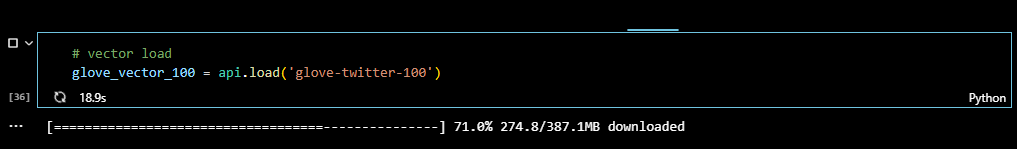

In [37]:
# 유사도 확인하기
glove_vector_100.most_similar("twitter")

[('facebook', 0.9003353714942932),
 ('fb', 0.8688419461250305),
 ('instagram', 0.8349379897117615),
 ('tweet', 0.8055214285850525),
 ('tweets', 0.7990750670433044),
 ('tumblr', 0.7980496287345886),
 ('tl', 0.7965695261955261),
 ('timeline', 0.7899292707443237),
 ('internet', 0.7715756893157959),
 ('twiter', 0.7672109007835388)]

In [40]:
glove_vector_100.most_similar("apple")

[('microsoft', 0.8225119709968567),
 ('samsung', 0.7785003185272217),
 ('iphone', 0.7668160796165466),
 ('google', 0.761960506439209),
 ('nokia', 0.7489736676216125),
 ('blackberry', 0.741084635257721),
 ('nexus', 0.7407400608062744),
 ('ipad', 0.7365548014640808),
 ('galaxy', 0.7292877435684204),
 ('smartphone', 0.7188845276832581)]

In [41]:
glove_vector_100.most_similar(positive=["woman", "king"], negative=["man"])

[('queen', 0.7052316069602966),
 ('prince', 0.6666139364242554),
 ('mother', 0.6436765193939209),
 ('royal', 0.6417251229286194),
 ('father', 0.5952690243721008),
 ('african', 0.5883978009223938),
 ('princess', 0.588217556476593),
 ('called', 0.5842776894569397),
 ('meets', 0.584027886390686),
 ('american', 0.5815179944038391)]

In [42]:
glove_vector_100.similar_by_word("cat")

[('dog', 0.8752089142799377),
 ('kitty', 0.8015091419219971),
 ('pet', 0.7986468076705933),
 ('cats', 0.797942578792572),
 ('kitten', 0.7936834096908569),
 ('puppy', 0.7702749967575073),
 ('monkey', 0.7584263682365417),
 ('bear', 0.7507943511009216),
 ('dogs', 0.746006190776825),
 ('pig', 0.7117345929145813)]

In [43]:
glove_vector_100.n_similarity(["sushi", "shop"], ["japanese", "restaurant"])

0.72184855

In [44]:
glove_vector_100.similarity("cat","dog")

0.875209